In [1]:
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, f1_score
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import VotingClassifier
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
from pandas import get_dummies
from sklearn.decomposition import PCA
import pickle



In [2]:
df_titanic = pd.read_csv('../dataset/train.csv')
print(df_titanic.shape)
df_titanic = df_titanic.drop(['PassengerId', 'Name', 'Ticket', 'Cabin', 'Embarked'], axis=1)

df_titanic = df_titanic[df_titanic['Age'] >= 1]

df_titanic.dropna(inplace=True)

print(df_titanic.shape)

(891, 12)
(707, 7)


In [3]:
df_titanic.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,male,22.0,1,0,7.2500
1,1,1,female,38.0,1,0,71.2833
2,1,3,female,26.0,0,0,7.9250
3,1,1,female,35.0,1,0,53.1000
4,0,3,male,35.0,0,0,8.0500


In [4]:
df_titanic.value_counts('Survived')

Survived
0    424
1    283
Name: count, dtype: int64

In [5]:
df_titanic['Fare'].value_counts().sort_index(ascending=False)

Fare
512.3292    3
263.0000    4
262.3750    2
247.5208    2
227.5250    3
           ..
6.4375      1
6.2375      1
5.0000      1
4.0125      1
0.0000      7
Name: count, Length: 219, dtype: int64

In [6]:
df_titanic['Fare'].value_counts().sort_index()

Fare
0.0000      7
4.0125      1
5.0000      1
6.2375      1
6.4375      1
           ..
227.5250    3
247.5208    2
262.3750    2
263.0000    4
512.3292    3
Name: count, Length: 219, dtype: int64

In [7]:
# def agrupar_sibsp(valor):
#     if valor == 0:
#         return 'Solo'
#     elif valor == 1:
#         return 'Pequeña familia'
#     elif valor == 2 or valor == 3:
#         return 'Familia mediana'
#     else:
#         return 'Gran familia'
# df_titanic['SibSp_categorizado'] = df_titanic['SibSp'].apply(agrupar_sibsp)
# df_titanic = df_titanic.drop(['SibSp'], axis=1)


# def agrupar_parch(valor):
#     if valor == 0:
#         return 'Solo'
#     elif valor == 1 or valor == 2:
#         return 'Pequeña familia'
#     elif valor == 3:
#         return 'Familia mediana'
#     else:
#         return 'Gran familia'
    
# df_titanic['Parch_categorizado'] = df_titanic['Parch'].apply(agrupar_parch)
# df_titanic = df_titanic.drop(['Parch'], axis=1)

#numero familiares
# df_titanic['n_family'] = df_titanic['SibSp'] + df_titanic['Parch']
# df_titanic = df_titanic.drop(['SibSp', 'Parch'], axis=1)

# def agrupar_family(valor):
#     if valor == 0:
#         return 'Solo'
#     elif valor == 1 or valor == 2:
#         return 'Pequeña familia'
#     elif valor == 3 or valor == 4:
#         return 'Familia mediana'
#     else:
#         return 'Gran familia'

# df_titanic['Family_categorizado'] = df_titanic['n_family'].apply(agrupar_family)
# df_titanic = df_titanic.drop(['n_family'], axis=1)


def agrupar_fare(valor):
    if valor <= 50:
        return 'Baja'
    elif valor <= 100:
        return 'Media'
    elif valor <= 150:
        return 'Alta'
    else:
        return 'Muy alta'

df_titanic['Fare_categorizado'] = df_titanic['Fare'].apply(agrupar_fare)
df_titanic = df_titanic.drop(['Fare'], axis=1)

df_encoded = df_titanic = pd.get_dummies(df_titanic, columns=['Fare_categorizado'], prefix=['Fare'], dtype='int64')


In [8]:
def asignar_grupo_edad(edad):
    if edad >= 0 and edad <= 12:
        return 'kid'
    elif edad >= 13 and edad <= 17:
        return 'teenager'
    elif edad >= 18 and edad <= 35:
        return 'young_adult'
    elif edad >= 36 and edad <= 64:
        return 'adult'
    elif edad >= 65:
        return 'senior'

# Aplicar la función a la columna 'EDAD_INICIO_VALORACION' y crear la nueva columna 'GRUPO_EDAD'
df_titanic['age_group'] = df_titanic['Age'].apply(asignar_grupo_edad)
df_titanic.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare_Alta,Fare_Baja,Fare_Media,Fare_Muy alta,age_group
0,0,3,male,22.0,1,0,0,1,0,0,young_adult
1,1,1,female,38.0,1,0,0,0,1,0,adult
2,1,3,female,26.0,0,0,0,1,0,0,young_adult
3,1,1,female,35.0,1,0,0,0,1,0,young_adult
4,0,3,male,35.0,0,0,0,1,0,0,young_adult


In [9]:
#get_dummies
df_titanic = pd.get_dummies(df_titanic, columns=['age_group'], prefix=['age_'], dtype='int64')
df_titanic = pd.get_dummies(df_titanic, columns=['Sex'], dtype='int64')
df_titanic = pd.get_dummies(df_titanic, columns=['Pclass'], prefix=['class_'], dtype='int64')

df_titanic.head()

,Survived,Age,SibSp,Parch,Fare_Alta,Fare_Baja,Fare_Media,Fare_Muy alta,age__adult,age__kid,age__senior,age__teenager,age__young_adult,Sex_female,Sex_male,class__1,class__2,class__3
0,0,22.0,1,0,0,1,0,0,0,0,0,0,1,0,1,0,0,1
1,1,38.0,1,0,0,0,1,0,1,0,0,0,0,1,0,1,0,0
2,1,26.0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,1
3,1,35.0,1,0,0,0,1,0,0,0,0,0,1,1,0,1,0,0
4,0,35.0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,1


In [10]:
df_titanic = df_titanic.drop(['Age'], axis=1)


In [11]:
df_titanic.head()

,Survived,SibSp,Parch,Fare_Alta,Fare_Baja,Fare_Media,Fare_Muy alta,age__adult,age__kid,age__senior,age__teenager,age__young_adult,Sex_female,Sex_male,class__1,class__2,class__3
0,0,1,0,0,1,0,0,0,0,0,0,1,0,1,0,0,1
1,1,1,0,0,0,1,0,1,0,0,0,0,1,0,1,0,0
2,1,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,1
3,1,1,0,0,0,1,0,0,0,0,0,1,1,0,1,0,0
4,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,1


In [12]:
X = df_titanic.drop(['Survived'], axis=1)
y = df_titanic['Survived']
X.head()
print(X.shape)


(707, 16)


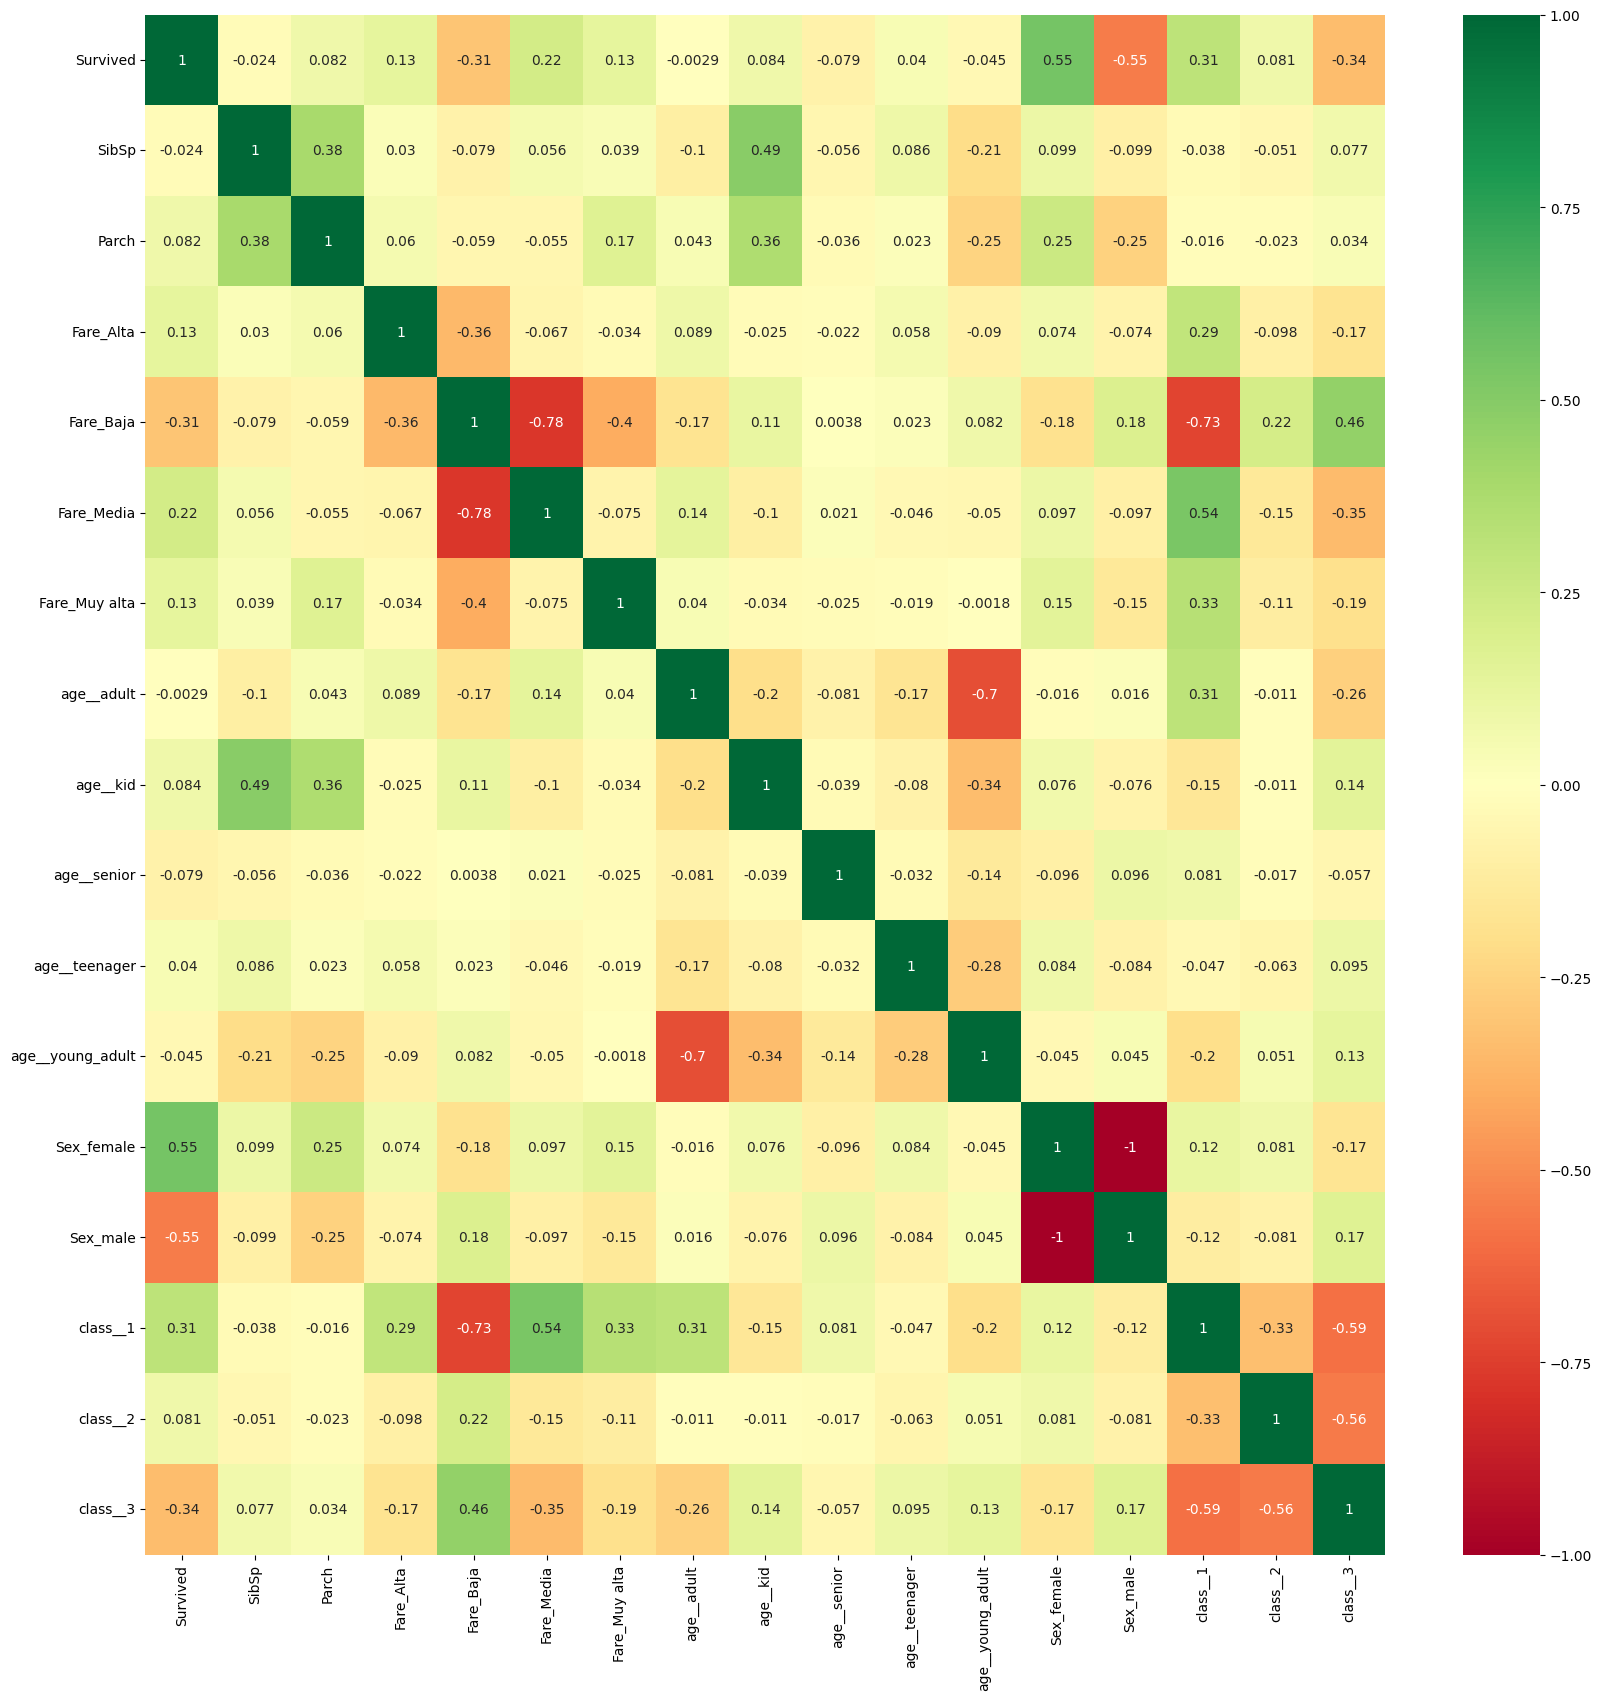

In [13]:
#correlacion
import seaborn as sns
import matplotlib.pyplot as plt
corrmat = df_titanic.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(df_titanic[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [14]:
X.head()
X.keys()

Index(['SibSp', 'Parch', 'Fare_Alta', 'Fare_Baja', 'Fare_Media',
       'Fare_Muy alta', 'age__adult', 'age__kid', 'age__senior',
       'age__teenager', 'age__young_adult', 'Sex_female', 'Sex_male',
       'class__1', 'class__2', 'class__3'],
      dtype='object')

In [15]:
# X_scaled = StandardScaler().fit_transform(X)
# X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [17]:
# pca = PCA(n_components=1)
# X_train = pca.fit_transform(X_train)
# X_test = pca.transform(X_test)

In [18]:
# pfn = tabpfn.TabPFNClassifier()
# pfn.fit(X_train, y_train)

# # Extraer el f1_score
# y_pred = pfn.predict(X_test)
# f1 = f1_score(y_test, y_pred , average='macro')

# print(f'F1 score: {f1}')


In [19]:
param_grid = {
    'n_neighbors': [3, 5, 7, 10, 15],
    'weights': ['uniform', 'distance'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
    'leaf_size': [10, 30, 50, 70],
    'p': [1, 2]
}


knn = KNeighborsClassifier()

knn_gs = GridSearchCV(knn, param_grid, cv=5, verbose=1, n_jobs=-1, refit=True)

#scores
knn_gs.fit(X_train, y_train)
print(knn_gs.best_params_)
print(knn_gs.best_score_)
print('Score:', knn_gs.score(X_test, y_test))

y_pred = knn_gs.predict(X_test)
f1 = f1_score(y_test, y_pred , average='macro')
print(f'F1 score: {f1}')

Fitting 5 folds for each of 320 candidates, totalling 1600 fits
{'algorithm': 'kd_tree', 'leaf_size': 70, 'n_neighbors': 10, 'p': 1, 'weights': 'uniform'}
0.8212389380530973
Score: 0.8450704225352113
F1 score: 0.8250839865621501


In [27]:
knn_best = knn_gs.best_estimator_
knn_best.fit(X, y)
#export model
import pickle
pickle.dump(knn_best, open('model.pkl','wb'))

In [20]:
X.shape

(707, 16)

In [21]:
# #svc
# param_grid_svc = {
#     'C': [0.1, 1, 10, 100], 
#     'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
#     'degree': [2, 3, 4], 
#     'gamma': ['scale', 'auto'], 
#     'coef0': [0.0, 0.5, 1.0]
# }

# svc = SVC()

# svc_gs = GridSearchCV(svc, param_grid_svc, cv=5, verbose=1, n_jobs=-1)

# #scores
# svc_gs.fit(X_train, y_train)
# print(svc_gs.best_params_)
# print(svc_gs.best_score_)
# svc_gs.score(X_test, y_test)

In [22]:
# #Logistic regression
# param_grid_log = {
#     'penalty': ['l2'],
#     'C': [0.01, 0.1, 1, 10, 100],
#     'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
#     'max_iter': [100, 200, 300, 400, 500],
#     'class_weight': [None, 'balanced'],
#     'l1_ratio': [None, 0.5, 0.7, 1] # Only used if penalty is 'elasticnet'
# }

# log = LogisticRegression()

# lr_gs = GridSearchCV(log, param_grid_log, cv=5, verbose=1, n_jobs=-1)

# #scores
# lr_gs.fit(X_train, y_train)
# print(lr_gs.best_params_)
# print(lr_gs.best_score_)
# lr_gs.score(X_test, y_test)


In [23]:
# #XGBOOST
# param_grid_xgb2 = {
#     'max_depth': [3, 4, 5, 6, 7, 8, 9, 10],
#     'learning_rate': [0.01, 0.05, 0.1, 0.2, 0.3],
#     'n_estimators': [100, 200, 300, 400, 500],
#     'gamma': [0, 0.1, 0.2, 0.3, 0.4],
#     'min_child_weight': [0, 1, 2, 3, 4]
# }
# param_grid_xgb = {
#     'max_depth': [3],
#     'learning_rate': [0.1],
#     'n_estimators': [200],
#     'gamma': [0.1],
#     'min_child_weight': [0]
# }

# xgb = XGBClassifier()

# xgb_gs = GridSearchCV(xgb, param_grid_xgb, cv=10, verbose=1, n_jobs=-1)

# #scores
# xgb_gs.fit(X_train, y_train)
# print(xgb_gs.best_params_)
# print(xgb_gs.best_score_)
# xgb_gs.score(X_test, y_test)


In [24]:
# #Random Forest
# param_grid_rf2 = {
#     'n_estimators': [100, 200, 300, 400, 500],
#     'criterion': ['gini', 'entropy'],
#     'max_depth': [None, 5, 10, 15, 20],
#     'min_samples_split': [2, 5, 10, 15],
#     'min_samples_leaf': [1, 2, 5, 10]
# }
# param_grid_rf = {
#     'n_estimators': [300],
#     'criterion': ['gini'],
#     'max_depth': [10],
#     'min_samples_split': [10],
#     'min_samples_leaf': [1]
# }

# rf = RandomForestClassifier()

# rf_gs = GridSearchCV(rf, param_grid_rf, cv=5, verbose=1, n_jobs=-1)

# #scores
# rf_gs.fit(X_train, y_train)
# print(rf_gs.best_params_)
# print(rf_gs.best_score_)
# print(rf_gs.score(X_test, y_test))


In [25]:
# ensemble_model = VotingClassifier(estimators=[
#     ('knn', knn_gs),
#     ('lr', lr_gs),
#     ('xgb', xgb_gs),
#     ('rf', rf_gs)
# ], voting='soft')  # Puedes usar 'hard' o 'soft' para el tipo de votación

# # Entrena el ensemble_model con tus datos
# ensemble_model.fit(X_train, y_train)

# # Evalúa el rendimiento del ensemble_model
# accuracy = ensemble_model.score(X_test, y_test)

In [26]:
# accuracy